# Problem Statement
Create an standardized index to catagorize the risk level of covid-19 spread in communities. It would help Based on the paper *A COVID-19 Reopening Readiness Index: The Key to Opening up the Economy*

Reference paper: __[A COVID-19 Reopening Readiness Index: The Key to Opening up the Economy](https://www.medrxiv.org/content/10.1101/2020.05.22.20110577v2.full.pdf)__

variables:
- mortality
- hospitalizations
- testing capacity
- number of infections
- infection rate

Other papers about reopening readiness
- __[Using random testing in a feedback-control loop to manage a safe exit from the
COVID-19 lockdown](https://www.medrxiv.org/content/10.1101/2020.04.09.20059360v2.full.pdf)__

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt # matplotlib.pyplot plots data

%matplotlib inline

**Data from John Hopkins Whiting School of Engineering** <br>
Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE<br>
URL: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19)

**The COVID Tracking Project**<br>
URL: [US data](https://covidtracking.com/data/download)

We are using the state data. Deprecated variables are:
* checkTimeEt
* commercialScore
* dateChecked
* dateModified
* grade
* hash
* hospitalized
* negativeIncrease
* negativeRegularScore
* negativeScore
* posNeg
* positiveScore
* score
* total

**Metadata**

| variable | type | description | Nulls? |
|:-|:-|:-|:-|
| dataQualityGrade | string | The COVID Tracking Project grade of the completeness of the data reporting by a state. | No |
| date | integer | Date on which data was collected by The COVID Tracking Project. | No |
| death | integer | Total fatalities with confirmed OR probable COVID-19 case diagnosis (per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/)). In states where the information is available, it only tracks fatalities with confirmed OR probable COVID-19 case diagnosis where COVID-19 is an underlying cause of death according to the death certificate based on [WHO guidelines](https://www.who.int/classifications/icd/Guidelines_Cause_of_Death_COVID-19.pdf?ua=1). | Yes |
| deathConfirmed | integer | Total fatalities with confirmed COVID-19 case diagnosis (per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/)). In states where the information is available, it only tracks fatalities with confirmed COVID-19 case diagnosis where COVID-19 is an underlying cause of death according to the death certificate based on [WHO guidelines](https://www.who.int/classifications/icd/Guidelines_Cause_of_Death_COVID-19.pdf?ua=1). | Yes |
| deathIncrease | integer | Daily difference in death | Yes |
| deathProbable | integer | Total fatalities with probable COVID-19 case diagnosis (per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). In states where the information is available, it only tracks fatalities with probable COVID-19 case diagnosis where COVID-19 is an underlying cause of death according to the death certificate based on [WHO guidelines](https://www.who.int/classifications/icd/Guidelines_Cause_of_Death_COVID-19.pdf?ua=1). | Yes |
| fips | integer | Federal Information Processing Standards (FIPS) code for the state or territory. | Yes |
| hospitalizedCumulative | integer | Total number of individuals who have ever been hospitalized with COVID-19. Definitions vary by state / territory. Where possible, we report hospitalizations with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | No |
| hospitalizedCurrently | integer | Individuals who are currently hospitalized with COVID-19. Definitions vary by state / territory. Where possible, we report hospitalizations with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| hospitalizedIncrease | integer | Daily difference in hospitalized | Yes |
| inIcuCumulative | integer | Total number of individuals who have ever been hospitalized in the Intensive Care Unit with COVID-19. Definitions vary by state / territory. Where possible, we report patients in the ICU with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| inIcuCurrently | integer | Individuals who are currently hospitalized in the Intensive Care Unit with COVID-19. Definitions vary by state / territory. Where possible, we report patients in the ICU with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| lastUpdateEt | string | Date and time in Eastern time the state or territory last updated the data. | No |
| negative | integer | Individuals with a completed viral test that returned a negative result. For states / territories that do not report this number directly, we compute it using one of several methods, depending on which data points the state provides. | Yes |
| negativeTestsViral | integer | Completed viral tests that returned negative results. | Yes |
| onVentilatorCumulative | integer | Total number of individuals who have ever been hospitalized under advanced ventilation with COVID-19. Definitions vary by state / territory. Where possible, we report patients on ventilation with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| onVentilatorCurrently | integer | Individuals who are currently hospitalized under advanced ventilation with COVID-19. Definitions vary by state / territory. Where possible, we report patients on ventilation with confirmed or probable COVID-19 cases per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| pending | integer | Tests whose results have not yet been reported. | Yes |
| positive | integer | Individuals with confirmed or probable COVID-19 per the expanded [CSTE case definition](https://cdn.ymaws.com/www.cste.org/resource/resmgr/2020ps/Interim-20-ID-01_COVID-19.pdf) of April 5th, 2020 [approved by the CDC](https://wwwn.cdc.gov/nndss/conditions/coronavirus-disease-2019-covid-19/case-definition/2020/). | Yes |
| positiveCasesViral | integer | Individuals with a completed viral test that returned a positive result. | Yes |
| positiveIncrease | integer | Increase in *positive* computed by subtracting the value of *positive* from the previous day from the value of *positive* for the current day. | Yes |
| positiveTestsViral | integer | Completed viral tests that returned positive results. | Yes |
| recovered | integer | Individuals who have recovered from COVID-19. Definitions vary by state / territory. | Yes |
| state | string | Two-letter abbreviation for the state or territory. | No |
| totalTestResults | integer | Where possible, we report total tests in units of people tested, rather than units of specimens tested. Currently computed by adding _positive_ and _negative_ values because some states do not report totals and to work around different reporting cadences for cases and tests. | Yes |
| totalTestResultsIncrease | integer | Daily Difference in totalTestResults | Yes |
| totalTestsViral | integer | Completed viral tests. | Yes |

[FIPS Codes](https://www.census.gov/library/reference/code-lists/ansi.html#par_textimage_3)

In [2]:
pd.set_option('display.max_columns', None)

#daily numbers for each state, from COVID tracking
url_states = "https://api.covidtracking.com/v1/states/daily.csv"
df_states = pd.read_csv(url_states, error_bad_lines=False) 

# drop deprecated variables
df_states.drop(columns=['checkTimeEt','commercialScore','dateChecked','dateModified','grade',
               'hash','hospitalized','negativeIncrease','negativeRegularScore','negativeScore','posNeg','positiveScore',
               'score','total'], inplace=True)
df_states.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,death,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,totalTestResults,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,20200813,AK,4750.0,289303.0,NaN,46.0,NaN,NaN,NaN,3.0,NaN,1360.0,A,8/13/2020 00:00,27.0,294053.0,4662.0,289088.0,4750.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,95,294053.0,1471,0,0
1,20200813,AL,105557.0,697005.0,NaN,1365.0,12456.0,NaN,1292.0,NaN,707.0,41523.0,B,8/13/2020 11:00,1890.0,798501.0,NaN,NaN,101496.0,1821.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,771,802562.0,6791,8,164
2,20200813,AR,51766.0,531714.0,NaN,473.0,3566.0,NaN,NaN,112.0,466.0,44602.0,A,8/13/2020 14:32,582.0,583480.0,NaN,531714.0,51766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1836.0,NaN,5,652,583480.0,9909,16,94
3,20200813,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,8/5/2020 00:00,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,1396.0,0,0,0
4,20200813,AZ,190794.0,867384.0,NaN,1411.0,20503.0,497.0,NaN,334.0,NaN,26736.0,A+,8/13/2020 00:00,4383.0,1056770.0,NaN,NaN,189386.0,4130.0,253.0,NaN,NaN,246800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1351,1058178.0,13950,36,682


In [3]:
#number of rows and columns
df_states.shape

(9033, 39)

In [4]:
# check for null values
df_states.isnull().sum()

date                              0
state                             0
positive                         15
negative                        156
pending                        7911
hospitalizedCurrently          2621
hospitalizedCumulative         4107
inIcuCurrently                 5676
inIcuCumulative                7687
onVentilatorCurrently          6120
onVentilatorCumulative         8555
recovered                      3283
dataQualityGrade               1101
lastUpdateEt                    343
death                           698
totalTestsViral                5305
positiveTestsViral             7815
negativeTestsViral             7779
positiveCasesViral             3094
deathConfirmed                 5805
deathProbable                  6917
totalTestEncountersViral       8775
totalTestsPeopleViral          5370
totalTestsAntibody             7842
positiveTestsAntibody          8162
negativeTestsAntibody          8374
totalTestsPeopleAntibody       8578
positiveTestsPeopleAntibody 

In [5]:
# drop variables with over 5k nulls
df_states.drop(columns=['pending','inIcuCurrently','inIcuCumulative','onVentilatorCurrently','onVentilatorCumulative',
               'totalTestsViral','positiveTestsViral','negativeTestsViral','deathConfirmed','deathProbable',
        'totalTestEncountersViral','totalTestsPeopleViral','totalTestsAntibody','positiveTestsAntibody',
        'negativeTestsAntibody','totalTestsPeopleAntigen','positiveTestsPeopleAntigen','totalTestsAntigen',
        'totalTestsPeopleAntibody','positiveTestsPeopleAntibody','negativeTestsPeopleAntibody',
        'positiveTestsAntigen'],
               inplace=True)
# check for null values
df_states.isnull().sum()

date                           0
state                          0
positive                      15
negative                     156
hospitalizedCurrently       2621
hospitalizedCumulative      4107
recovered                   3283
dataQualityGrade            1101
lastUpdateEt                 343
death                        698
positiveCasesViral          3094
fips                           0
positiveIncrease               0
totalTestResults               7
totalTestResultsIncrease       0
deathIncrease                  0
hospitalizedIncrease           0
dtype: int64

In [6]:
df_states.drop(columns=['hospitalizedCumulative','recovered','dataQualityGrade','lastUpdateEt','positiveCasesViral',
        'positiveIncrease','totalTestResultsIncrease','deathIncrease','hospitalizedIncrease'],
               inplace=True)
# check for null values
df_states.isnull().sum()

date                        0
state                       0
positive                   15
negative                  156
hospitalizedCurrently    2621
death                     698
fips                        0
totalTestResults            7
dtype: int64

In [7]:
 def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe. 
    Shows the relationship between features.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  
                                                0 ------------------>  1
                                                Expect a line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

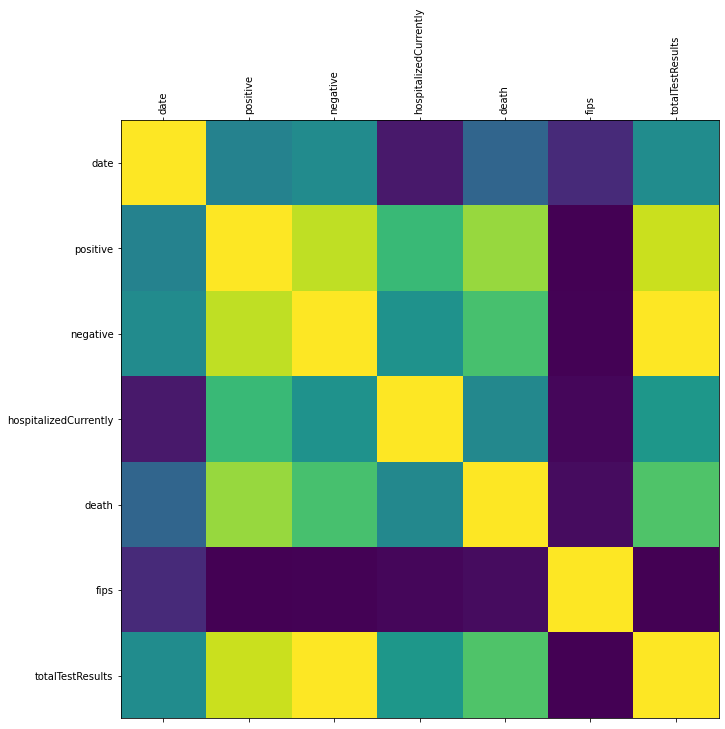

In [8]:
plot_corr(df_states)

In [9]:
df_states.drop(columns=['negative'],inplace=True)

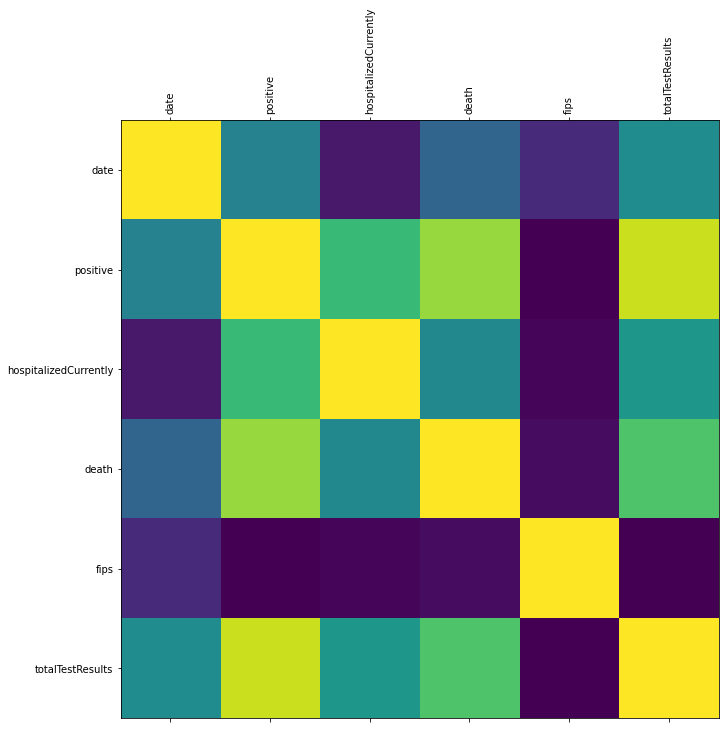

In [10]:
plot_corr(df_states)

In [11]:
df_hospital_beds = pd.read_csv("usa-hospital-beds_dataset_usa-hospital-beds.csv")

In [12]:
df_hospital_beds.head()

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,NaN,Phoenix,AZ,85012,Maricopa,Arizona,4.0,13.0,4013.0,62.0,62.0,0,0,NaN,NaN,0,0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,NaN,Tucson,AZ,85723,Pima,Arizona,4.0,19.0,4019.0,295.0,295.0,2,2,NaN,NaN,0,2
2,-119.779742,36.773323,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,NaN,Fresno,CA,93703,Fresno,California,6.0,19.0,6019.0,54.0,54.0,2,2,NaN,NaN,0,2
3,-72.957610,41.284400,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,NaN,West Haven,CT,6516,New Haven,Connecticut,9.0,9.0,9009.0,216.0,216.0,1,1,NaN,NaN,0,2
4,-75.606533,39.740206,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,NaN,Wilmington,DE,19805,New Castle,Delaware,10.0,3.0,10003.0,62.0,62.0,0,0,NaN,NaN,0,1


In [13]:
df_hospital_beds.shape

(6622, 23)

In [14]:
# check for null values
df_hospital_beds.isnull().sum()

X                                    18
Y                                    18
OBJECTID                              0
HOSPITAL_NAME                         0
HOSPITAL_TYPE                         0
HQ_ADDRESS                            0
HQ_ADDRESS1                        6254
HQ_CITY                               0
HQ_STATE                              0
HQ_ZIP_CODE                           0
COUNTY_NAME                          25
STATE_NAME                           25
STATE_FIPS                           25
CNTY_FIPS                            25
FIPS                                 25
NUM_LICENSED_BEDS                   152
NUM_STAFFED_BEDS                    240
NUM_ICU_BEDS                          0
ADULT_ICU_BEDS                        0
PEDI_ICU_BEDS                       739
BED_UTILIZATION                     714
Potential_Increase_In_Bed_Capac       0
AVG_VENTILATOR_USAGE                  0
dtype: int64

In [15]:
df_hospital_beds.drop(columns=['X','Y','OBJECTID','HOSPITAL_NAME','HOSPITAL_TYPE','HQ_ADDRESS',
                              'HQ_ADDRESS1','HQ_CITY','HQ_STATE','HQ_ZIP_CODE','COUNTY_NAME',
                              'STATE_NAME','CNTY_FIPS','FIPS','NUM_STAFFED_BEDS',
                              'ADULT_ICU_BEDS','PEDI_ICU_BEDS','Potential_Increase_In_Bed_Capac',
                              'BED_UTILIZATION','AVG_VENTILATOR_USAGE'],inplace=True)

In [16]:
df_hospital_beds.head(30)

,STATE_FIPS,NUM_LICENSED_BEDS,NUM_ICU_BEDS
0,4.0,62.0,0
1,4.0,295.0,2
2,6.0,54.0,2
3,9.0,216.0,1
4,10.0,62.0,0
5,11.0,164.0,1
6,12.0,432.0,2
7,16.0,46.0,1
8,22.0,111.0,1
9,28.0,160.0,10


In [17]:
#replace NaN with 0
df_hospital_beds = df_hospital_beds.fillna(0)
df_hospital_beds

,STATE_FIPS,NUM_LICENSED_BEDS,NUM_ICU_BEDS
0,4.0,62.0,0
1,4.0,295.0,2
2,6.0,54.0,2
3,9.0,216.0,1
4,10.0,62.0,0
...,...,...,...
6617,48.0,0.0,0
6618,42.0,0.0,0
6619,48.0,0.0,0
6620,48.0,0.0,0


In [18]:
#create a new dataframe using groupby
grouper = df_hospital_beds.groupby('STATE_FIPS')
df_total_hospital_beds = grouper['NUM_LICENSED_BEDS'].sum().to_frame(name = 'TOTAL_NUM_LICENSED_BEDS').reset_index()

#drop the null state_fips row
df_total_hospital_beds = df_total_hospital_beds[df_total_hospital_beds['STATE_FIPS'] != 0]

In [19]:
#create a new dataframe using groupby
grouper = df_hospital_beds.groupby('STATE_FIPS')
df_total_icu_beds = grouper['NUM_ICU_BEDS'].sum().to_frame(name = 'TOTAL_NUM_ICU_BEDS').reset_index()

#drop the null state_fips row
df_total_icu_beds = df_total_icu_beds[df_total_icu_beds['STATE_FIPS'] != 0]

In [20]:
df_states = df_states.join(df_total_hospital_beds.set_index(['STATE_FIPS'], verify_integrity=True ),on=['fips'], how='left')

In [21]:
df_states = df_states.join(df_total_icu_beds.set_index(['STATE_FIPS'], verify_integrity=True ),on=['fips'], how='left')


In [22]:
#sort by states and date
df_states = df_states.sort_values(["fips", "date"], ascending = (True, False))
df_states.head()

,date,state,positive,hospitalizedCurrently,death,fips,totalTestResults,TOTAL_NUM_LICENSED_BEDS,TOTAL_NUM_ICU_BEDS
1,20200813,AL,105557.0,1365.0,1890.0,1,802562.0,18611.0,1637.0
57,20200812,AL,104786.0,1372.0,1882.0,1,795771.0,18611.0,1637.0
113,20200811,AL,103851.0,1506.0,1847.0,1,783689.0,18611.0,1637.0
169,20200810,AL,103020.0,1528.0,1797.0,1,780567.0,18611.0,1637.0
225,20200809,AL,101334.0,1595.0,1768.0,1,762451.0,18611.0,1637.0


In [23]:
# create 3-day rolling averages of cases, infection rate, mortality, hospitalization, 
# testing capacity and hospital rate (hospital_rate) and hospital rate using ICU beds (hospital_rate2)
for i in range(0,df_states.shape[0]-2):
  if(df_states.iloc[i,5] == df_states.iloc[i+1,5] and df_states.iloc[i+1,5] == df_states.iloc[i+2,5]):
    df_states.loc[df_states.index[i],'count'] = np.round(((df_states.iloc[i,2]+ df_states.iloc[i+1,2] +df_states.iloc[i+2,2])/3),2)
    df_states.loc[df_states.index[i],'testing_capacity'] = np.round(((df_states.iloc[i,6]+ df_states.iloc[i+1,6] +df_states.iloc[i+2,6])/3),2)
    df_states.loc[df_states.index[i],'mortality'] = np.round(((df_states.iloc[i,4]+ df_states.iloc[i+1,4] +df_states.iloc[i+2,4])/3),2)   
    df_states.loc[df_states.index[i],'hospitalization'] = np.round(((df_states.iloc[i,3]+ df_states.iloc[i+1,3] +df_states.iloc[i+2,3])/3),2)   
    if(df_states.iloc[i,6] != 0 and df_states.iloc[i+1,6] != 0 and df_states.iloc[i+2,6] != 0):
      df_states.loc[df_states.index[i],'infection_rate'] = np.round(df_states.loc[df_states.index[i],'count'] / df_states.loc[df_states.index[i],'testing_capacity'],2)
    else:
      df_states.loc[df_states.index[i],'infection_rate'] = 0  
    if(df_states.iloc[i,7] != 0 and df_states.iloc[i+1,7] != 0 and df_states.iloc[i+2,7] != 0):
      df_states.loc[df_states.index[i],'hospitalization_rate'] = np.round(df_states.loc[df_states.index[i],'hospitalization'] / df_states.loc[df_states.index[i],'TOTAL_NUM_LICENSED_BEDS'],2)
    else:
      df_states.loc[df_states.index[i],'hospitalization_rate'] = 0   
    if(df_states.iloc[i,8] != 0 and df_states.iloc[i+1,8] != 0 and df_states.iloc[i+2,8] != 0):
      df_states.loc[df_states.index[i],'hospitalization_rate2'] = np.round(df_states.loc[df_states.index[i],'hospitalization'] / df_states.loc[df_states.index[i],'TOTAL_NUM_ICU_BEDS'],2)
    else:
      df_states.loc[df_states.index[i],'hospitalization_rate2'] = 0 
  else: 
    df_states.loc[df_states.index[i],'count'] = 0
    df_states.loc[df_states.index[i],'testing_capacity'] = 0
    df_states.loc[df_states.index[i],'mortality'] = 0
    df_states.loc[df_states.index[i],'hospitalization'] = 0
    
        

In [24]:
#48 is Texas
df_states.loc[df_states['fips'] == 48].tail(30)

,date,state,positive,hospitalizedCurrently,death,fips,totalTestResults,TOTAL_NUM_LICENSED_BEDS,TOTAL_NUM_ICU_BEDS,count,testing_capacity,mortality,hospitalization,infection_rate,hospitalization_rate,hospitalization_rate2
7495,20200402,TX,4669.0,196.0,70.0,48,50679.0,82125.0,8719.0,3977.33,47176.00,56.33,196.0,0.08,0.0,0.02
7551,20200401,TX,3997.0,196.0,58.0,48,47857.0,82125.0,8719.0,3380.00,42243.00,44.33,NaN,0.08,NaN,NaN
7607,20200331,TX,3266.0,196.0,41.0,48,42992.0,82125.0,8719.0,2898.33,34877.33,36.33,NaN,0.08,NaN,NaN
7663,20200330,TX,2877.0,NaN,34.0,48,35880.0,82125.0,8719.0,2493.67,28966.67,31.67,NaN,0.09,NaN,NaN
7719,20200329,TX,2552.0,NaN,34.0,48,25760.0,82125.0,8719.0,2111.67,24895.33,28.00,NaN,0.08,NaN,NaN
7775,20200328,TX,2052.0,NaN,27.0,48,25260.0,82125.0,8719.0,1726.33,23450.00,22.67,NaN,0.07,NaN,NaN
7831,20200327,TX,1731.0,NaN,23.0,48,23666.0,82125.0,8719.0,1367.00,19528.00,17.67,NaN,0.07,NaN,NaN
7887,20200326,TX,1396.0,NaN,18.0,48,21424.0,82125.0,8719.0,926.67,15361.67,13.00,NaN,0.06,NaN,NaN
7943,20200325,TX,974.0,NaN,12.0,48,13494.0,82125.0,8719.0,578.67,11572.00,9.67,NaN,0.05,NaN,NaN
7999,20200324,TX,410.0,NaN,9.0,48,11167.0,82125.0,8719.0,365.33,9992.67,7.33,NaN,0.04,NaN,NaN


In [25]:
df_states.loc[df_states['fips'] == 48].head(30)

,date,state,positive,hospitalizedCurrently,death,fips,totalTestResults,TOTAL_NUM_LICENSED_BEDS,TOTAL_NUM_ICU_BEDS,count,testing_capacity,mortality,hospitalization,infection_rate,hospitalization_rate,hospitalization_rate2
47,20200813,TX,513575.0,6879.0,9289.0,48,4230763.0,82125.0,8719.0,507005.00,4141995.33,9011.00,7041.00,0.12,0.09,0.81
103,20200812,TX,506820.0,7028.0,9034.0,48,4106360.0,82125.0,8719.0,499419.00,4089628.00,8744.67,7182.67,0.12,0.09,0.82
159,20200811,TX,500620.0,7216.0,8710.0,48,4088863.0,82125.0,8719.0,492599.67,4062796.00,8553.00,7319.00,0.12,0.09,0.84
215,20200810,TX,490817.0,7304.0,8490.0,48,4073661.0,82125.0,8719.0,486220.67,4037394.00,8430.67,7537.67,0.12,0.09,0.86
271,20200809,TX,486362.0,7437.0,8459.0,48,4025864.0,82125.0,8719.0,480789.67,4013017.67,8299.33,7791.33,0.12,0.09,0.89
327,20200808,TX,481483.0,7872.0,8343.0,48,4012657.0,82125.0,8719.0,474497.33,3985889.67,8080.67,8079.67,0.12,0.10,0.93
383,20200807,TX,474524.0,8065.0,8096.0,48,4000532.0,82125.0,8719.0,467298.67,3951082.33,7798.67,8274.00,0.12,0.10,0.95
439,20200806,TX,467485.0,8302.0,7803.0,48,3944480.0,82125.0,8719.0,459517.67,3912521.00,7520.33,8477.00,0.12,0.10,0.97
495,20200805,TX,459887.0,8455.0,7497.0,48,3908235.0,82125.0,8719.0,451027.33,3875889.67,7258.00,8649.33,0.12,0.11,0.99
551,20200804,TX,451181.0,8674.0,7261.0,48,3884848.0,82125.0,8719.0,441226.67,3822404.33,7038.00,8820.67,0.12,0.11,1.01


In [26]:
#6 is California
df_states.loc[df_states['fips'] == 6].tail(30)

,date,state,positive,hospitalizedCurrently,death,fips,totalTestResults,TOTAL_NUM_LICENSED_BEDS,TOTAL_NUM_ICU_BEDS,count,testing_capacity,mortality,hospitalization,infection_rate,hospitalization_rate,hospitalization_rate2
7453,20200402,CA,9191.0,1922.0,203.0,6,33000.0,83560.0,8691.0,8276.00,30727.00,175.67,1798.00,0.27,0.02,0.21
7509,20200401,CA,8155.0,1855.0,171.0,6,29927.0,83560.0,8691.0,7361.33,28725.67,152.33,1634.67,0.26,0.02,0.19
7565,20200331,CA,7482.0,1617.0,153.0,6,29254.0,83560.0,8691.0,6545.67,27502.33,136.33,1361.00,0.24,0.02,0.16
7621,20200330,CA,6447.0,1432.0,133.0,6,26996.0,83560.0,8691.0,5599.33,26148.33,119.00,1166.67,0.21,0.01,0.13
7677,20200329,CA,5708.0,1034.0,123.0,6,26257.0,83560.0,8691.0,4743.33,24236.00,100.67,938.00,0.20,0.01,0.11
7733,20200328,CA,4643.0,1034.0,101.0,6,25192.0,83560.0,8691.0,3842.67,22279.00,81.33,NaN,0.17,NaN,NaN
7789,20200327,CA,3879.0,746.0,78.0,6,21259.0,83560.0,8691.0,3080.00,19973.67,65.33,NaN,0.15,NaN,NaN
7845,20200326,CA,3006.0,NaN,65.0,6,20386.0,83560.0,8691.0,2487.67,18072.00,52.67,NaN,0.14,NaN,NaN
7901,20200325,CA,2355.0,NaN,53.0,6,18276.0,83560.0,8691.0,2063.33,16043.33,40.00,NaN,0.13,NaN,NaN
7957,20200324,CA,2102.0,NaN,40.0,6,15554.0,83560.0,8691.0,1790.33,14231.33,31.33,NaN,0.13,NaN,NaN


In [27]:
#6 is California
df_states.loc[df_states['fips'] == 6].head(30)

,date,state,positive,hospitalizedCurrently,death,fips,totalTestResults,TOTAL_NUM_LICENSED_BEDS,TOTAL_NUM_ICU_BEDS,count,testing_capacity,mortality,hospitalization,infection_rate,hospitalization_rate,hospitalization_rate2
5,20200813,CA,593141.0,6424.0,10808.0,6,9445493.0,83560.0,8691.0,584536.00,9311746.33,10641.33,6610.00,0.06,0.08,0.76
61,20200812,CA,586056.0,6647.0,10648.0,6,9303467.0,83560.0,8691.0,574126.00,9162699.67,10491.67,6725.33,0.06,0.08,0.77
117,20200811,CA,574411.0,6759.0,10468.0,6,9186279.0,83560.0,8691.0,563494.00,9003583.67,10373.33,6792.67,0.06,0.08,0.78
173,20200810,CA,561911.0,6770.0,10359.0,6,8998353.0,83560.0,8691.0,553952.67,8843999.67,10280.33,6858.33,0.06,0.08,0.79
229,20200809,CA,554160.0,6849.0,10293.0,6,8826119.0,83560.0,8691.0,546121.00,8710176.00,10164.33,7027.33,0.06,0.08,0.81
285,20200808,CA,545787.0,6956.0,10189.0,6,8707527.0,83560.0,8691.0,538061.00,8601624.00,10023.00,7239.33,0.06,0.09,0.83
341,20200807,CA,538416.0,7277.0,10011.0,6,8596882.0,83560.0,8691.0,531039.33,8502248.33,9861.00,7438.00,0.06,0.09,0.86
397,20200806,CA,529980.0,7485.0,9869.0,6,8500463.0,83560.0,8691.0,524709.67,8405192.00,9691.00,7555.67,0.06,0.09,0.87
453,20200805,CA,524722.0,7552.0,9703.0,6,8409400.0,83560.0,8691.0,519683.33,8299936.33,9530.67,7603.67,0.06,0.09,0.87
509,20200804,CA,519427.0,7630.0,9501.0,6,8305713.0,83560.0,8691.0,514496.67,8175461.33,9415.00,7673.33,0.06,0.09,0.88


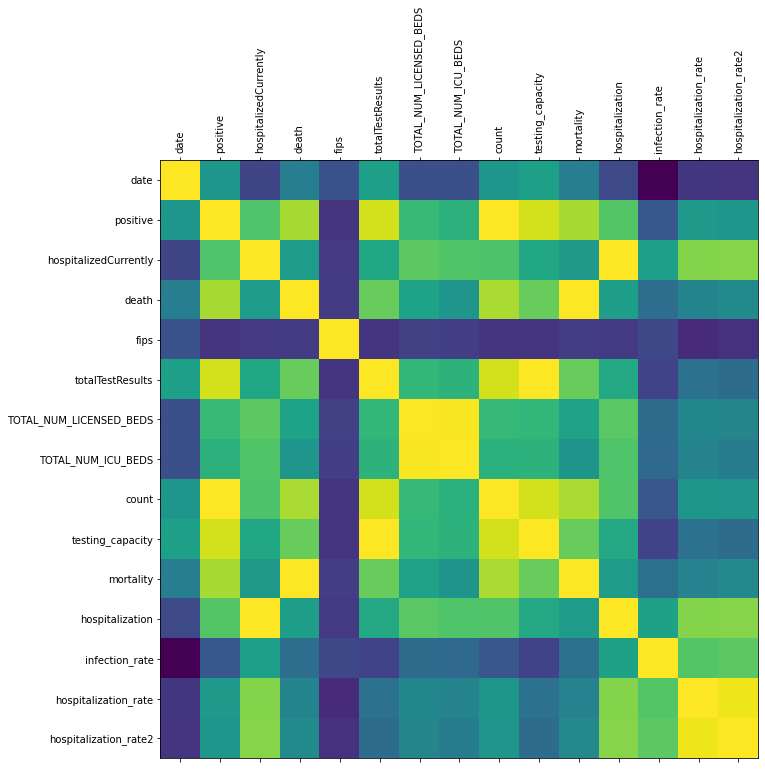

In [28]:
plot_corr(df_states)